In [1]:
from Classes import GenData, KnapsackSolver, NeuralNetworkDP
import numpy as np
import matplotlib.pyplot as plt
import time

2024-10-11 13:53:03.450984: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
acc_ratio_n_bin = []
acc_ratio_n_dp = []
acc_ratio_n_gh = []

acc_ratio_W_bin = []
acc_ratio_W_dp = []
acc_ratio_W_gh = []

time_n_bin = []
time_n_dp = []
time_n_gh = []

time_W_bin = []
time_W_dp = []
time_W_gh = []

n_start = 1
n_end = 3
n_space = np.round(np.logspace(n_start,n_end)).astype(int)
W_fix = 500

W_start = 2
W_end = 4
W_space = np.round(np.logspace(W_start,W_end)).astype(int)
n_fix = 50

In [3]:
for i in n_space:
    data = GenData(i,W_fix)
    w,v = data.generate()

    opt_bin = KnapsackSolver(solver='Bin').knapsackSolver(i, W_fix, v, w)
    opt_dyn = KnapsackSolver(solver='DP').knapsackSolver(i, W_fix, v, w)
    opt_grh = KnapsackSolver(solver='GH').knapsackSolver(i, W_fix, v, w)

    opt_val_bin = np.sum(v[opt_bin])
    opt_val_dp = np.sum(v[opt_dyn])
    opt_val_gh = np.sum(v[opt_grh])

    acc_ratio_n_bin.append(opt_val_bin-opt_val_bin)
    acc_ratio_n_dp.append(opt_val_bin-opt_val_dp)
    acc_ratio_n_gh.append(opt_val_dp-opt_val_gh)

acc_ratio_n_bin = np.array(acc_ratio_n_bin)
acc_ratio_n_dp = np.array(acc_ratio_n_dp)
acc_ratio_n_gh = np.array(acc_ratio_n_gh)

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 24.0.0 24A348)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0x4fb9a6de
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+02, 5e+02]
  Objective range  [2e+02, 5e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+02, 5e+02]
Found heuristic solution: objective 520.0000000
Presolve removed 1 rows and 10 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 2: 623 520 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.230000000000e+02, best bound 6.230000000000e+02, gap 

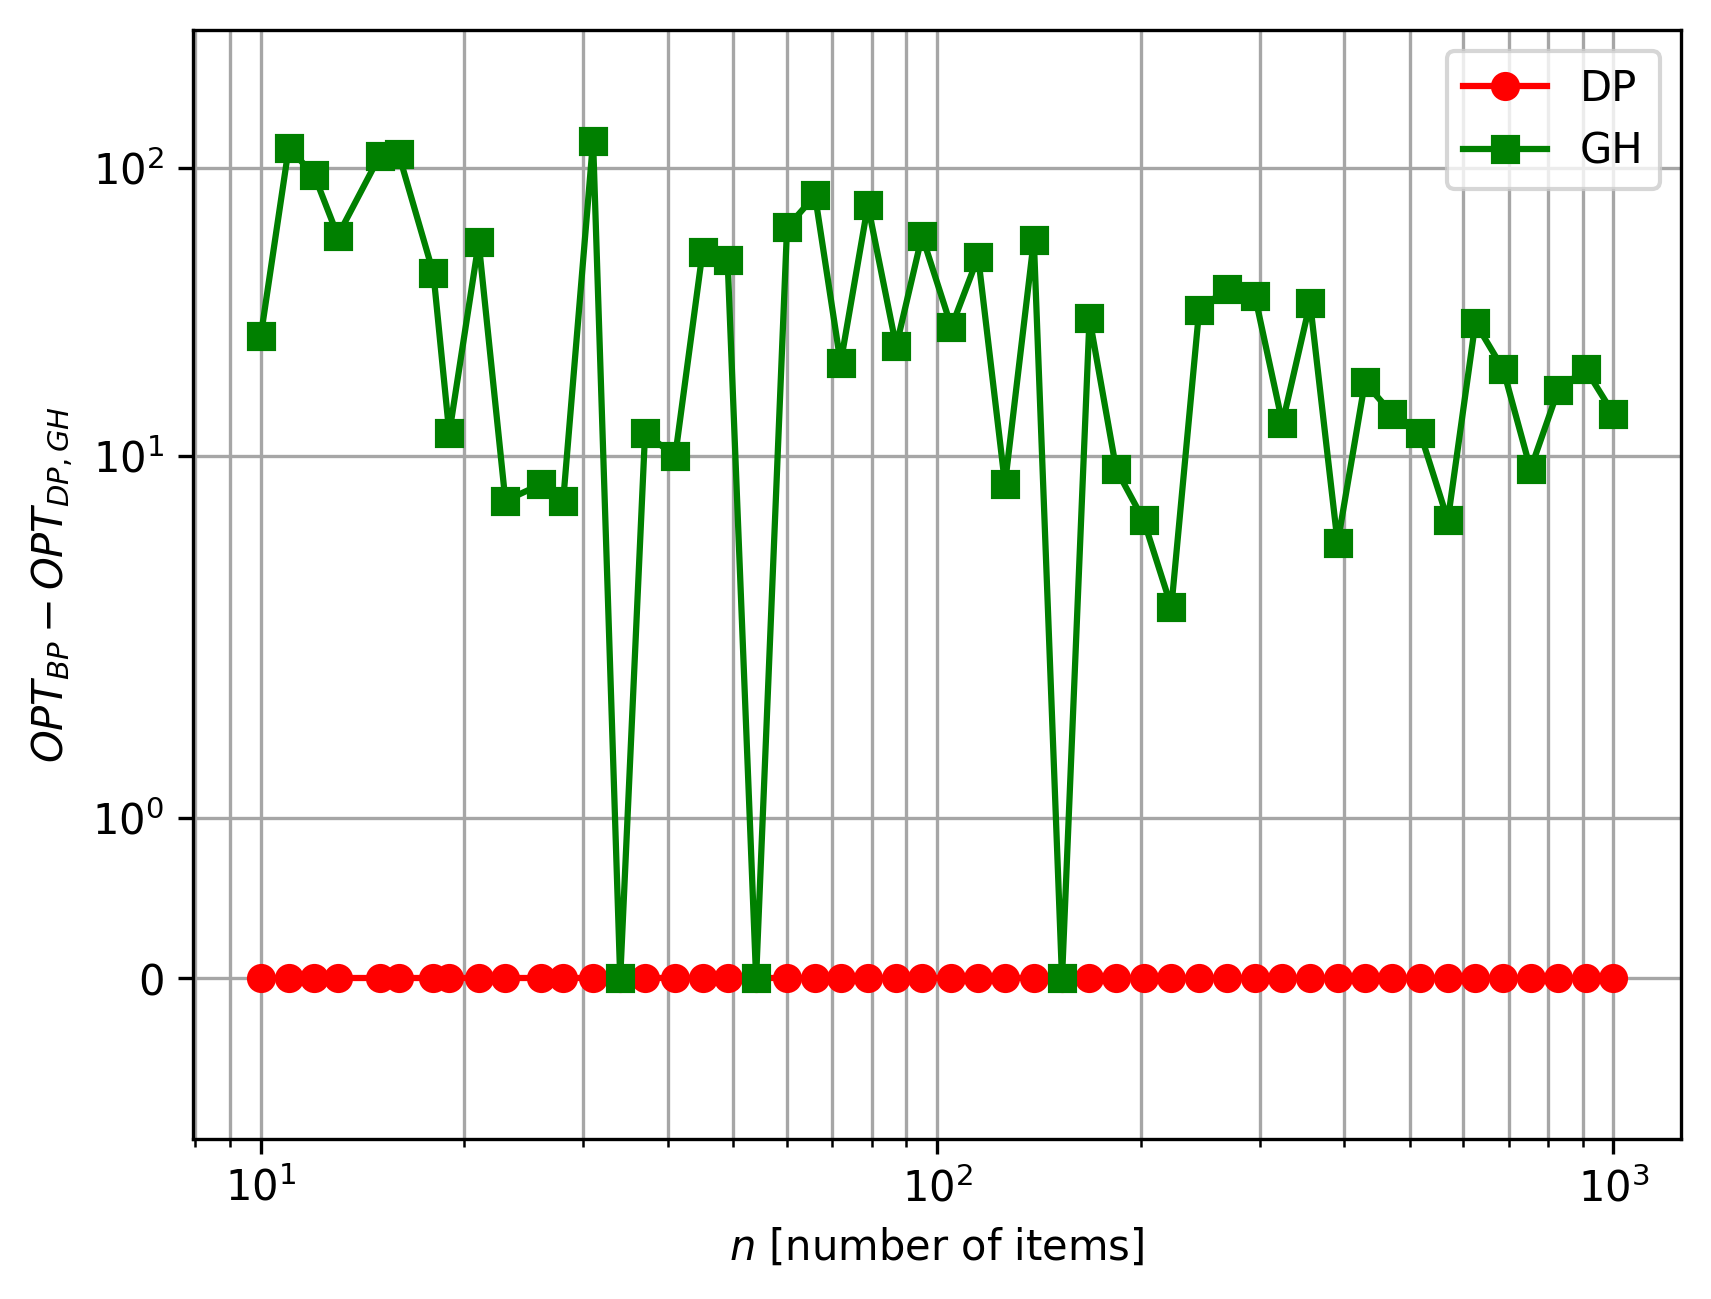

In [4]:
plt.figure(dpi=300)
#plt.plot(n_space,acc_ratio_n_bin, '-b^', markersize=8, label='BP')
plt.plot(n_space,acc_ratio_n_dp, '-ro', label='DP')
plt.plot(n_space,acc_ratio_n_gh, '-gs', label='GH')
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(-1,300)
plt.grid(True, which="both", ls="-", color='0.65')
plt.xlabel(r'$n$ [number of items]')
plt.ylabel(r'$OPT_{BP}-OPT_{DP,GH}$')
plt.legend()
#plt.savefig('acc_plot_n_W_500.png')
plt.show()

In [5]:
for i in W_space:
    data = GenData(n_fix,i)
    w,v = data.generate()

    opt_bin = KnapsackSolver(solver='Bin').knapsackSolver(n_fix, i, v, w)
    opt_dyn = KnapsackSolver(solver='DP').knapsackSolver(n_fix, i, v, w)
    opt_grh = KnapsackSolver(solver='GH').knapsackSolver(n_fix, i, v, w)

    opt_val_bin = np.sum(v[opt_bin])
    opt_val_dp = np.sum(v[opt_dyn])
    opt_val_gh = np.sum(v[opt_grh])

    acc_ratio_W_bin.append(opt_val_bin-opt_val_bin)
    acc_ratio_W_dp.append(opt_val_bin-opt_val_dp)
    acc_ratio_W_gh.append(opt_val_bin-opt_val_gh)

acc_ratio_W_bin = np.array(acc_ratio_W_bin)
acc_ratio_W_dp = np.array(acc_ratio_W_dp)
acc_ratio_W_gh = np.array(acc_ratio_W_gh)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 24.0.0 24A348)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 50 columns and 50 nonzeros
Model fingerprint: 0x0645f902
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [3e+00, 1e+02]
  Objective range  [1e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+02]
Found heuristic solution: objective 140.0000000
Presolve removed 1 rows and 50 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 2: 170 140 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.700000000000e+02, best bound 1.700000000000e+02, gap 0.0000%
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] -

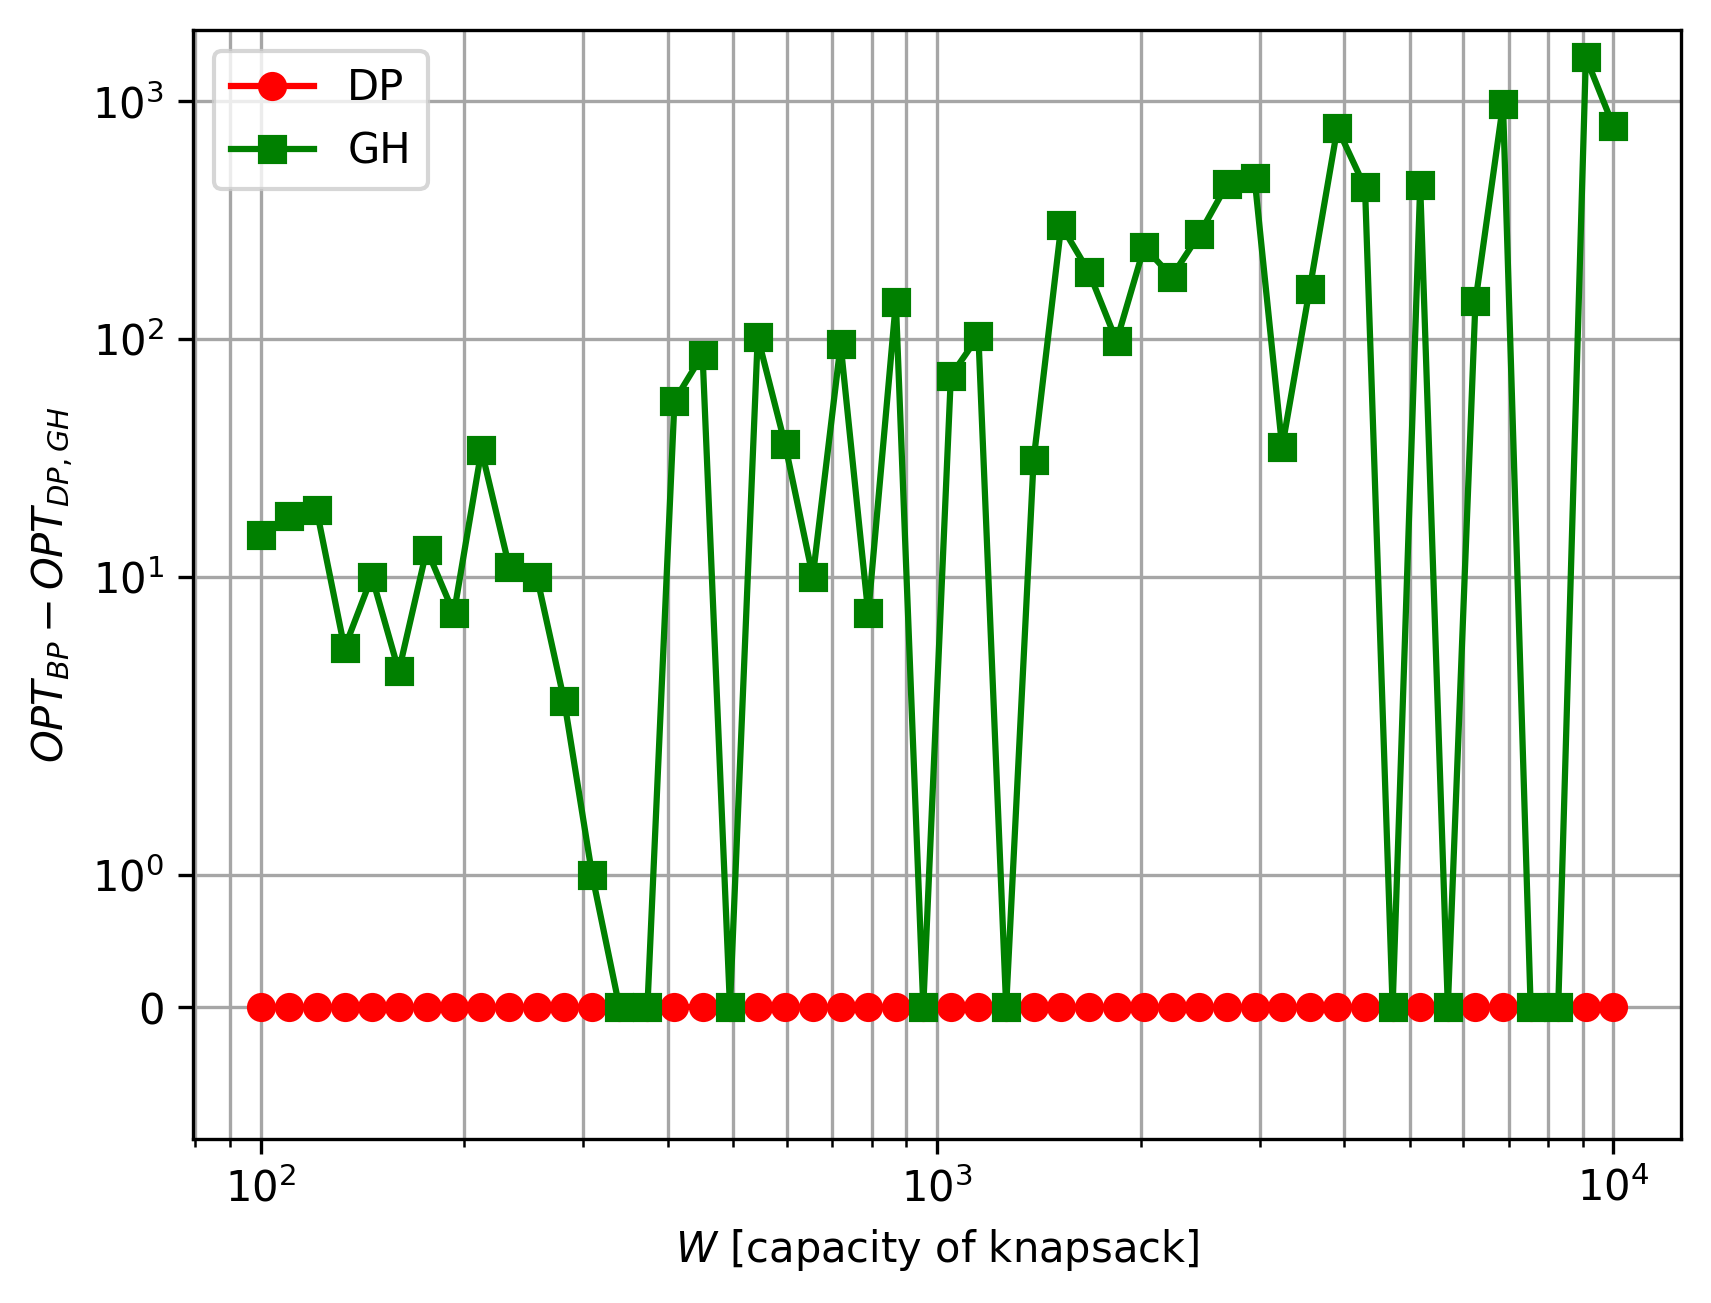

In [6]:
plt.figure(dpi=300)
#plt.plot(W_space,acc_ratio_W_bin, '-b^', markersize=8, label='BP')
plt.plot(W_space,acc_ratio_W_dp, '-ro', label='DP')
plt.plot(W_space,acc_ratio_W_gh, '-gs', label='GH')
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(-1,2000)
plt.grid(True, which="both", ls="-", color='0.65')
plt.xlabel(r'$W$ [capacity of knapsack]')
plt.ylabel(r'$OPT_{BP}-OPT_{DP,GH}$')
plt.legend()
#plt.savefig('acc_plot_W_n_50.png')
plt.show()

In [7]:
for i in n_space:
    data = GenData(i,W_fix)
    w,v = data.generate()

    start_bin = time.time()
    opt_bin = KnapsackSolver(solver='Bin').knapsackSolver(i, W_fix, v, w)
    end_bin = time.time()
    execution_time_bin = end_bin - start_bin
    time_n_bin.append(execution_time_bin)
    
    start_dyn = time.time()
    opt_dyn = KnapsackSolver(solver='DP').knapsackSolver(i, W_fix, v, w)
    end_dyn = time.time()
    execution_time_dyn = end_dyn - start_dyn
    time_n_dp.append(execution_time_dyn)
    
    start_grh = time.time()
    opt_grh = KnapsackSolver(solver='Bin').knapsackSolver(i, W_fix, v, w)
    end_grh = time.time()
    execution_grh = end_grh - start_grh
    time_n_gh.append(execution_grh)

time_n_bin = np.array(time_n_bin)
time_n_dp = np.array(time_n_dp)
time_n_gh = np.array(time_n_gh)


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 24.0.0 24A348)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 10 columns and 10 nonzeros
Model fingerprint: 0x74ff10c9
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [2e+01, 5e+02]
  Objective range  [7e+01, 5e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+02, 5e+02]
Found heuristic solution: objective 537.0000000
Presolve removed 1 rows and 10 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 2: 698 537 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.980000000000e+02, best bound 6.980000000000e+02, gap 0.0000%
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] -

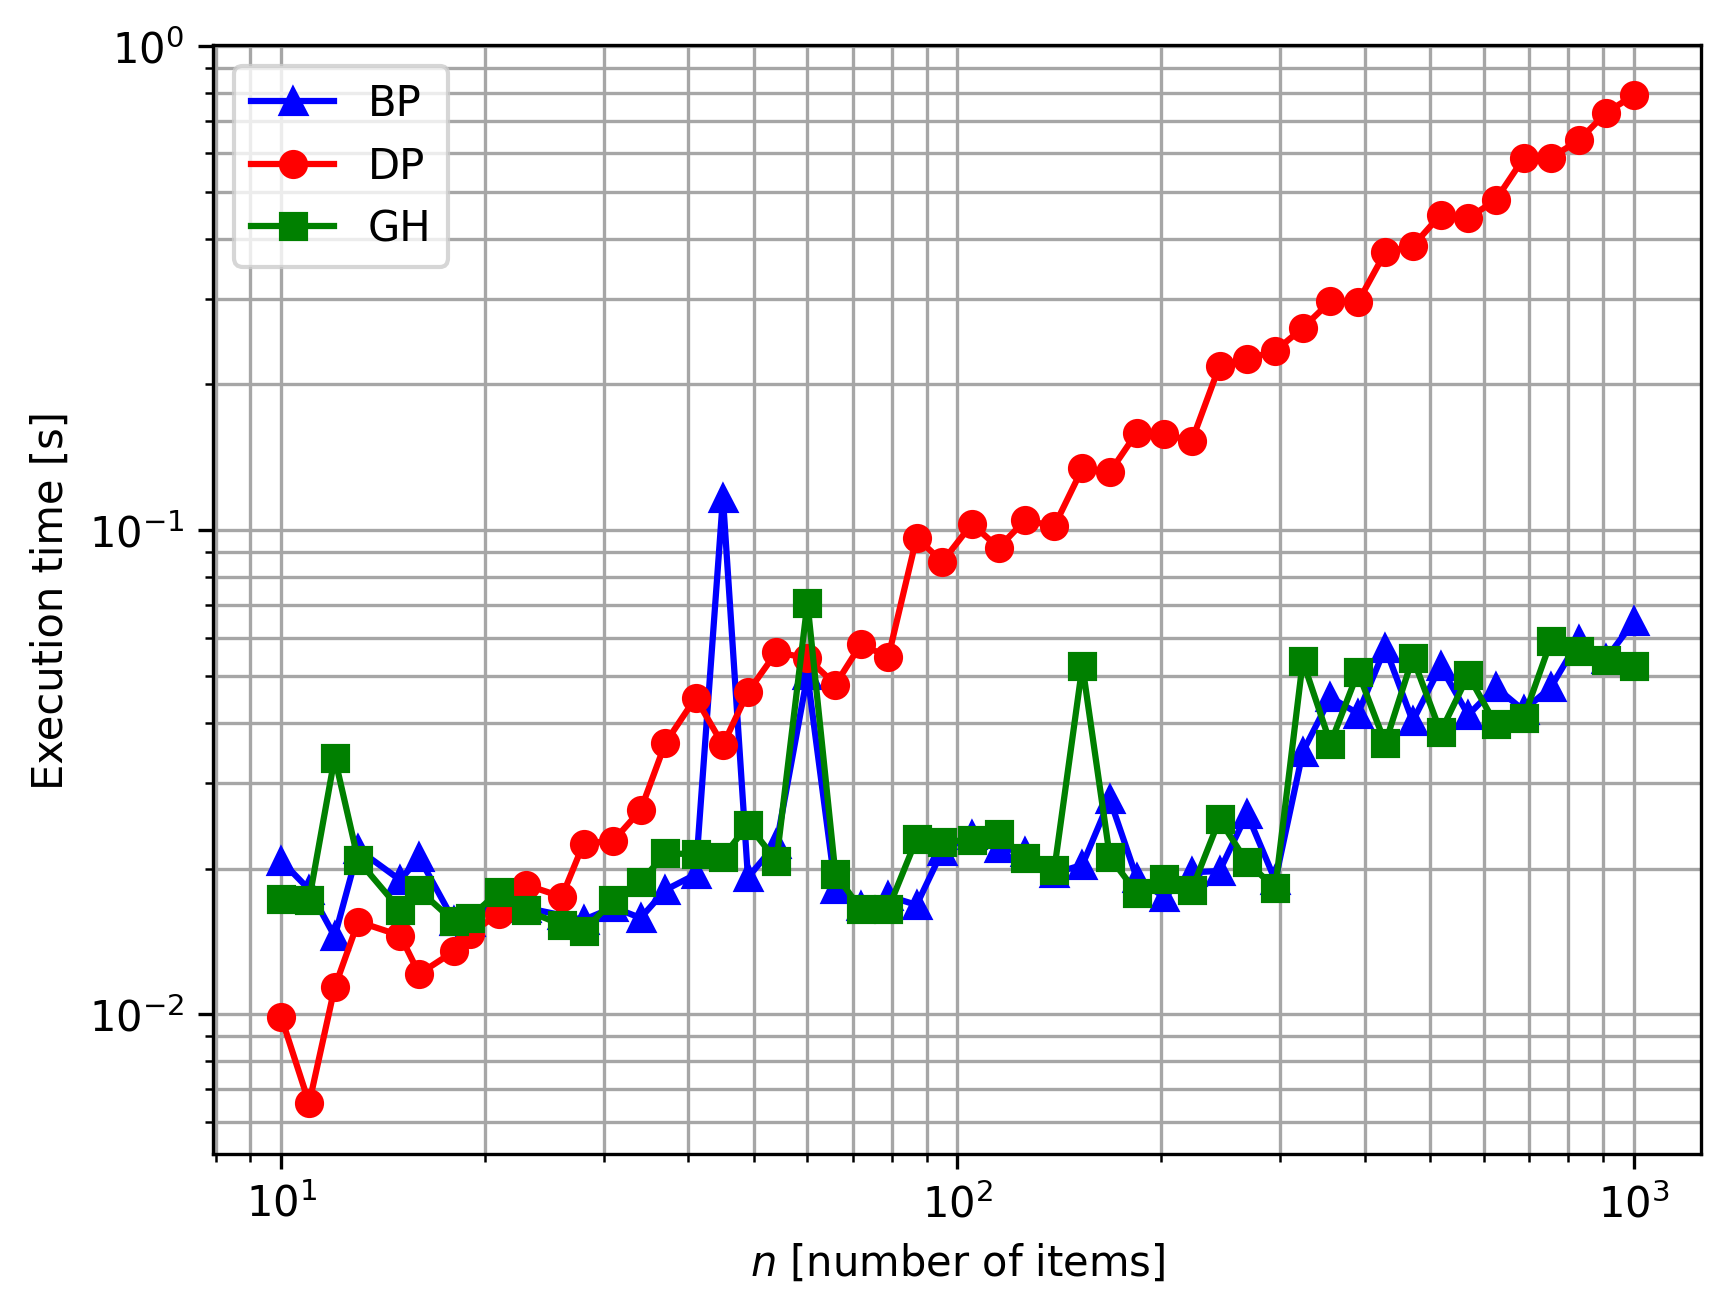

In [8]:
plt.figure(dpi=300)
plt.plot(n_space,time_n_bin, '-b^', label='BP')
plt.plot(n_space,time_n_dp, '-ro', label='DP')
plt.plot(n_space,time_n_gh, '-gs', label='GH')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-", color='0.65')
plt.xlabel(r'$n$ [number of items]')
plt.ylabel(r'Execution time [s]')
plt.legend()
#plt.savefig('ex_time_plot_n_W_500.png')
plt.show()

In [9]:
for i in W_space:
    data = GenData(n_fix,i)
    w,v = data.generate()

    start_bin = time.time()
    opt_bin = KnapsackSolver(solver='Bin').knapsackSolver(n_fix, i, v, w)
    end_bin = time.time()
    execution_time_bin = end_bin - start_bin
    time_W_bin.append(execution_time_bin)
    
    start_dyn = time.time()
    opt_dyn = KnapsackSolver(solver='DP').knapsackSolver(n_fix, i, v, w)
    end_dyn = time.time()
    execution_time_dyn = end_dyn - start_dyn
    time_W_dp.append(execution_time_dyn)
    
    start_grh = time.time()
    opt_grh = KnapsackSolver(solver='Bin').knapsackSolver(n_fix, i, v, w)
    end_grh = time.time()
    execution_grh = end_grh - start_grh
    time_W_gh.append(execution_grh)

time_W_bin = np.array(time_W_bin)
time_W_dp = np.array(time_W_dp)
time_W_gh = np.array(time_W_gh)


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 24.0.0 24A348)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 50 columns and 50 nonzeros
Model fingerprint: 0x043f80dd
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [3e+00, 1e+02]
  Objective range  [1e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+02, 1e+02]
Found heuristic solution: objective 119.0000000
Presolve removed 1 rows and 50 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 2: 190 119 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.900000000000e+02, best bound 1.900000000000e+02, gap 0.0000%
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] -

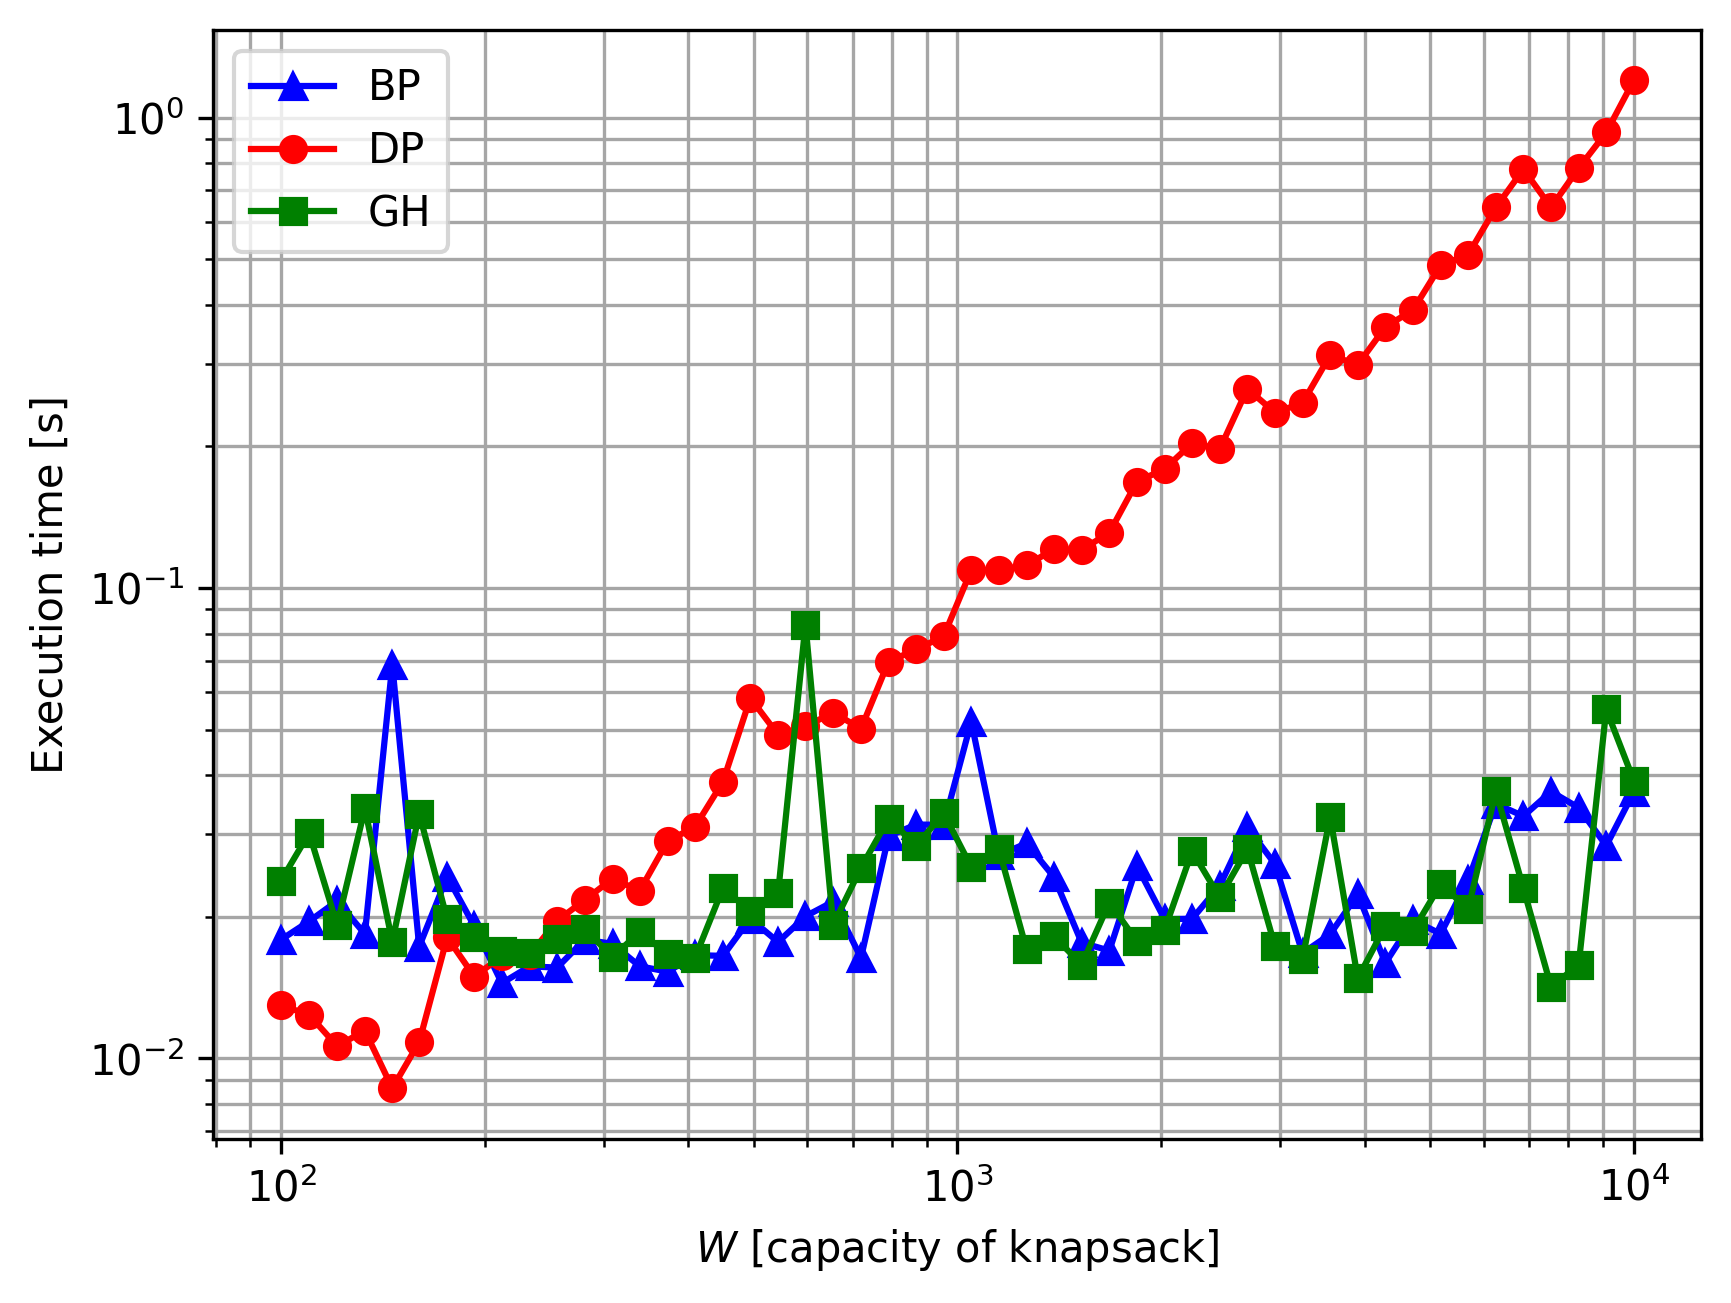

In [10]:
plt.figure(dpi=300)
plt.plot(W_space,time_W_bin, '-b^', label='BP')
plt.plot(W_space,time_W_dp, '-ro', label='DP')
plt.plot(W_space,time_W_gh, '-gs', label='GH')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-", color='0.65')
plt.xlabel(r'$W$ [capacity of knapsack]')
plt.ylabel(r'Execution time [s]')
plt.legend()
#plt.savefig('ex_time_plot_W_n_50.png')
plt.show()